In [24]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import norm
import scipy as sp
from scipy.integrate import odeint,quad,simps,trapezoid,cumtrapz
from scipy.special import eval_hermite,eval_hermitenorm,erfinv
from scipy.misc import derivative
from math import sqrt,sin,pi,cos,exp,log,factorial
from scipy.spatial import KDTree
from IPython.core.display import display, HTML
import sys
sys.path.append(r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/repository')
figures_route = r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/MSc Project - Latex/Figures/'
from nonparametric_generator import *
import tikzplotlib
import matplotlib
def pgf_switch(setting = 'off'):
    if setting == 'off':
        matplotlib.use('module://ipykernel.pylab.backend_inline')
        matplotlib.rcParams.update({
            "pgf.texsystem": "xelatex",
            'font.family': ['sans-serif'],
            'text.usetex': False,
            'pgf.rcfonts': True,
        })
    else:
        matplotlib.use("pgf")
        matplotlib.rcParams.update({
            "pgf.texsystem": "pdflatex",
            'font.family': 'serif',
            'text.usetex': True,
            'pgf.rcfonts': False,
        })
display(HTML("<style>.container { width:95% !important; }</style>"))

# Estimation of the operator $\mathcal{L}$

$$V(x) = \frac{5}{6}x^6 - \frac{5}{2}x^4$$

\begin{align}
dX_t &= -\nabla V(X_t)dt + \sqrt{2D}dW_t \\
dX_t &= (-5X_t^5 +10X_t^3)dt + \sqrt{2D}dW_t \\
X_0 &= 0 \\
\end{align}

In [25]:
V = lambda x:  (5/6)*x**6 - (5/2)*x**4
DV = lambda x:  5*x**5 - 10*x**3
def DWSimulation(x0, n,dt,D):
    """
    Function to create the trayectory of a OU process
    with difussion paramter D 

    :param x0: Intial position
    :param n:  Number of steps
    "param dt: Step size
    :param D:  Difussion parameter

    :return X: Trajectory
    """
    t = np.linspace(x0,dt*n,n)
    X = np.zeros((n,1))
    noise = np.random.normal(loc=0,scale=np.sqrt(dt),size=(n,1))
    for i in range(1,n):
        x = X[i-1,:]
        X[i,:] = x -DV(x)*dt +sqrt(2*D) * noise[i,:]
    return(X)

In [36]:
x0 = 0
n = int(1e6)
dt = 1e-2
T = dt*n
D = 1
np.random.seed(1)
X = DWSimulation(x0,n,dt,D)

In [37]:
N = 5000
X_s = X[np.random.choice(range(n),size=N),:]

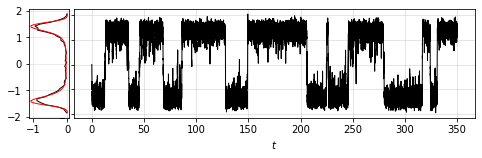

In [39]:
setting = 'off'
pgf_switch(setting)

gs1 = GridSpec(1, 2, width_ratios=[1,10],wspace=0.02,hspace=0.3)
fig = plt.figure(figsize=(8,2))
ax1 = fig.add_subplot(gs1[1])
_ = ax1.plot(np.linspace(x0,n*dt,n)[:35000], X[:35000,0],color='black',lw=1)
_ = ax1.grid(alpha=0.4)
_ = ax1.set_xlabel("$t$")
_ = ax1.set_ylabel("$X_t$")
# _ = ax1.set_title(f"Simulation, $T=$ {T:.0f}, $\Delta t =$ {dt}")
p_eq = density_estimation(X_s,0.01)
ax2 = fig.add_subplot(gs1[0])
_ = ax2.plot([-p_eq([x]) for x in np.linspace(min(X_s),max(X_s))],np.linspace(min(X_s),max(X_s)),color='k',lw=1)
Z = trapezoid(x=np.linspace(-3,3,100),y=[np.exp(-V(x)/D) for x in np.linspace(-3,3,100)])
_ = ax2.plot([-np.exp(-V(x)/D)/Z for x in np.linspace(min(X_s),max(X_s),100)],np.linspace(min(X_s),max(X_s),100),color='r',lw=1)
_ = ax2.grid(alpha=0.3)

if setting == 'on':
    _ = plt.savefig(figures_route + '1dDWtimeseries.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

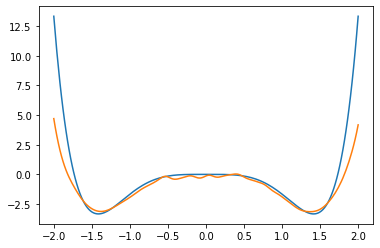

In [40]:
setting = 'off'
pgf_switch(setting)
p_eq = density_estimation(X_s,0.05)
V_hat = -np.log(p_eq(np.linspace(-2,2,200))) - np.log(Z)
_ = plt.plot(np.linspace(-2,2,200),V(np.linspace(-2,2,200)))
_ = plt.plot(np.linspace(-2,2,200),-np.log(p_eq(np.linspace(-2,2,200))) - np.log(Z))

0.029899497487437192


(-10.0, 10.0)

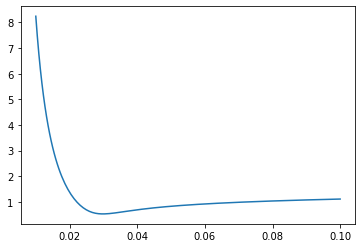

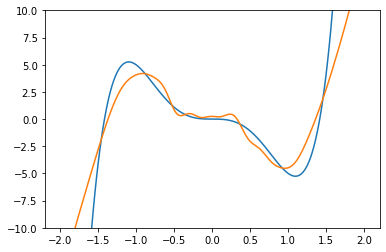

In [41]:
setting = 'off'
pgf_switch(setting)
MSE = np.zeros(200)
hs = np.linspace(0.01,0.1,200)
for i,h in enumerate(hs):
    p_eq = density_estimation(X_s,h)
    V_hat = -np.log(p_eq(np.linspace(-2,2,200))) - np.log(Z)
    MSE[i] = ((1/200) * np.linalg.norm(np.gradient(V_hat,4/200)-  DV(np.linspace(-2,2,200))))

plt.plot(hs,MSE)
h_op = hs[plt.argmin(MSE)]
print(h_op)
plt.figure()
p_eq = density_estimation(X_s,h)
_ = plt.plot(np.linspace(-2,2,200),DV(np.linspace(-2,2,200)))
plt.plot(np.linspace(-2,2,200),np.gradient(V_hat,4/200))
plt.ylim(-10,10)

epsilon = 1.02e-04
d = 0.99


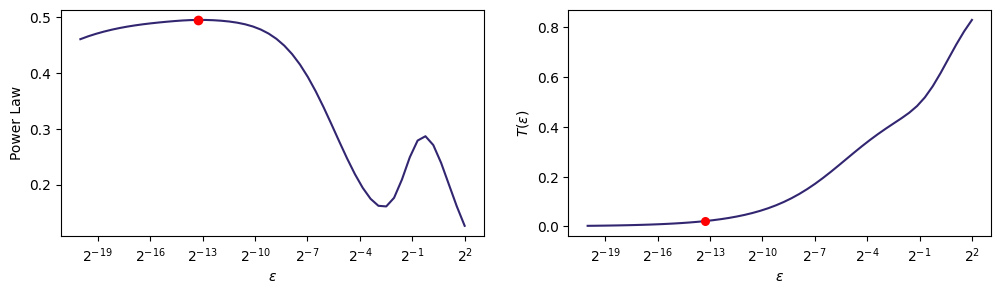

In [42]:
setting = 'off'
pgf_switch(setting)
epsilon, d = bandwidth_search(X_s,plot=True,verbose=True)

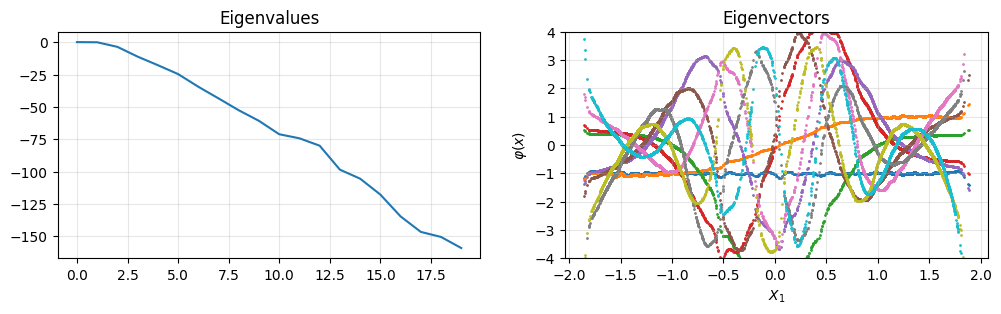

In [43]:
setting = 'off'
pgf_switch(setting)
l, phi,L_e, U = KNPGenerator(X_s,M=20,plot=True,return_extra=True,epsilon_0=h_op,epsilon=epsilon,d=d)
phi_1 = np.linalg.pinv(phi)

(-15.0, 15.0)

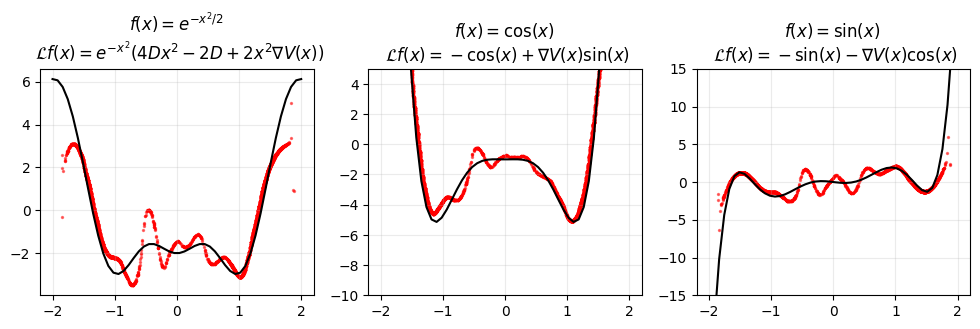

In [44]:
setting = 'off'
pgf_switch(setting)

fig,axs = plt.subplots(1,3,figsize=(12,3),dpi=100)

x = np.linspace(-2,2)

Y = np.exp(-X_s[:,0]**2)
c_coef = D*(phi_1@Y)
axs[0].set_title("$f(x) =e^{-x^2/2} $ \n $\mathcal{L}f(x) = e^{-x^2}(4Dx^2-2D + 2x^2\\nabla V(x)) $")
axs[0].plot(x, D*np.exp(-x**2)*(4*x**2-2) + DV(x)*2*x*np.exp(-x**2),color='k')
axs[0].scatter(X_s,np.sum((c_coef*l) * phi,axis=1),s=2,color='r',alpha=0.5)
# axs[0].scatter(X_s,D*L_e@Y,s=2,color='b',alpha=0.5)
axs[0].grid(alpha=0.25)

Y = np.cos(X_s[:,0])
c_coef =D*(phi_1@Y)
axs[1].set_title("$f(x) =\cos(x) $ \n $\mathcal{L}f(x) = -\cos(x)+\\nabla V(x)\sin(x) $")
axs[1].plot(x,-D*np.cos(x) + DV(x) * np.sin(x),color='k')
axs[1].scatter(X_s,np.sum((c_coef*l) * phi,axis=1),s=2,color='r',alpha=0.5)
# axs[1].scatter(X_s,D*L_e@Y,s=2,color='b',alpha=0.5)
axs[1].grid(alpha=0.25)
axs[1].set_ylim(-10,5)

Y = np.sin(X_s[:,0])
c_coef = D*(phi_1@Y)
axs[2].set_title("$f(x) =\sin(x) $ \n $\mathcal{L}f(x) = -\sin(x)-\\nabla V(x)\cos(x) $")
axs[2].plot(x,-D*np.sin(x) - DV(x) * np.cos(x),color='k')
axs[2].scatter(X_s,np.sum((c_coef*l) * phi,axis=1),s=2,color='r',label='Computing coefficients for $\\varphi$',alpha=0.5)
# axs[2].scatter(X_s,D*L_e@Y,s=2,color='b',alpha=0.5,label='Multiply the matrix')

axs[2].grid(alpha=0.25)
axs[2].set_ylim(-15,15)

(-13.0, 13.0)

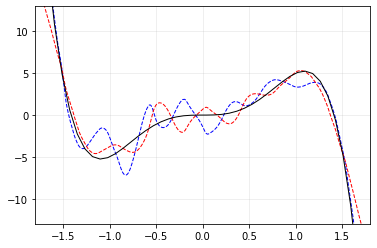

In [45]:
setting = 'off'
pgf_switch(setting)
Y = X_s[:,0]
c_coef =  (D/N)* Y@U
c_coef1 = (D) * phi_1 @ Y
plt.plot(np.sort(X_s,axis=0),np.sum((c_coef*l) * phi,axis=1)[np.argsort(X_s,axis=0)],color='b',lw=1,ls='--')
plt.plot(np.sort(X_s,axis=0),np.sum((c_coef1*l) * phi,axis=1)[np.argsort(X_s,axis=0)],color='r',lw=1,ls='--')
plt.plot(x, - DV(x) ,color='k',lw=1)
plt.grid(alpha=0.25)
plt.xlim(-1.8,1.8)
plt.ylim(-13,13)

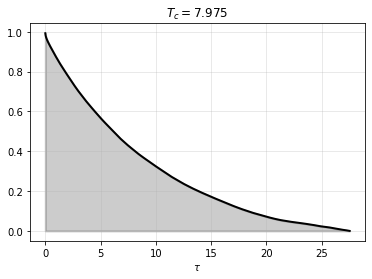

In [46]:
S = np.sum(X - X.mean(),axis=1)
n = len(S)
C_tau=np.zeros(n)
C0 = (1/n) * np.sum(S**2)
for j in range(1,n):
    if 1/(n-j)*sum(S[:n-j]*S[j:]) > 0:
        C_tau[j] = 1/(n-j)*sum(S[:n-j]*S[j:])
    else:
        break
C_tau = C_tau[C_tau>0]
pv = len(C_tau)
Tc = simps(x=np.linspace(0,n*dt,n)[:pv],y= C_tau / C0)

_ = plt.grid(alpha=0.35)
_ = plt.plot(np.linspace(0,n*dt,n)[:pv],C_tau / C0 ,color='k',lw=2)
_ = plt.fill_between(np.linspace(0,n*dt,n)[:pv],C_tau / C0 ,color='k',lw=2,alpha=0.2)
_ = plt.xlabel('$\\tau$')
_ = plt.title(f'$T_c = {Tc:.3f}$')

In [13]:
p_0 = np.vectorize(lambda x: sp.stats.norm.pdf(x,0,1))
p_eq = density_estimation(X_s)
rho_eq = np.vectorize(lambda x: p_eq(x)[0])
c_0 = (1/len(X_s)) * np.sum(((p_0(X_s)/rho_eq(X_s))) * phi,axis=0)
init = 0
tf = 1
Nt = 100
tarray = np.linspace(0,tf,Nt)
csol = np.exp(tarray[:,None] * l[None,:] * D ) * c_0

In [22]:
setting = 'on'
pgf_switch(setting)


X_sort = np.sort(np.ravel(X_s))
N = len(X_s)
dx = np.diff(X_sort)
fig, axs = plt.subplots(1, 1,figsize=(3.5,2))

for t in np.arange(1,100,12):
    est_density = p_eq(X_s.T)* np.sum(phi * csol[t],axis=1)

    est_density=est_density[np.argsort(np.ravel(X_s))]
    cum = trapezoid(x=X_sort,y= est_density.T)
    plt.plot(X_sort,(1/cum) *est_density,lw=1,color=plt.cm.bwr(t/100),ls='--')
    
    
plt.plot(np.linspace(min(X_s),max(X_s),100),p_eq(np.linspace(min(X_s),max(X_s),100).T),
         color='r',lw=1)
plt.plot(np.linspace(min(X_s),max(X_s),100),p_0(np.linspace(min(X_s),max(X_s),100)),
         color='k',lw=1)
plt.xlabel('$x$')
# plt.ylabel('$p(t,x)$')
plt.grid(alpha=0.3)
plt.ylim(0.01,0.68)
fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1), cmap=plt.cm.bwr),ax= axs,label='Time')
if setting == 'on':
    _ = plt.savefig(figures_route +'1dDWdensitiesTS.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

In [ ]:
_ = plt.figure(figsize=(7,4),dpi=100)
X_sort = np.sort(np.ravel(X_s))
N = len(X_s)
dx = np.diff(X_sort)
plt.figure(figsize=(10,5),dpi=200)
for t in [0,5,10,20,50,80,99]:
    est_density = np.zeros(N,)
    for i in range(N):
        est_density[i] =  rho_eq (X_s[i])* np.sum(csol[t] * phi[i,:])

    est_density=est_density[np.argsort(np.ravel(X_s))]
    cum = trapz(x=X_sort,y= est_density.T)
    plt.plot(X_sort,(1/cum) *est_density,lw=1,color=plt.cm.plasma(t/100))
    
    

plt.plot(np.linspace(min(X_s),max(X_s),100),p_0(np.linspace(min(X_s),max(X_s),100)),
         color='k',marker='x',ms=5,alpha=0.7)
plt.xlabel('$x$')
plt.ylabel('$p(t,x)$')
plt.grid(alpha=0.3)